## Analysis of Top 100 Global Video Game Sales from 2001 to 2015

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
top_game_sales = pd.read_csv('/Users/william/Documents/Treehouse/code/Python/Unit-Projects/video-game-sales/top100videogamesales.csv')


In [2]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)

In [3]:
top_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          100 non-null    int64  
 1   Name          100 non-null    object 
 2   Platform      100 non-null    object 
 3   Year          100 non-null    int64  
 4   Genre         100 non-null    object 
 5   Publisher     100 non-null    object 
 6   NA_Sales      100 non-null    float64
 7   EU_Sales      100 non-null    float64
 8   JP_Sales      100 non-null    float64
 9   Other_Sales   100 non-null    float64
 10  Global_Sales  100 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 8.7+ KB


In [4]:
top_game_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## 1. Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

Text(0.5, 1.0, 'Regional Sales by Publisher')

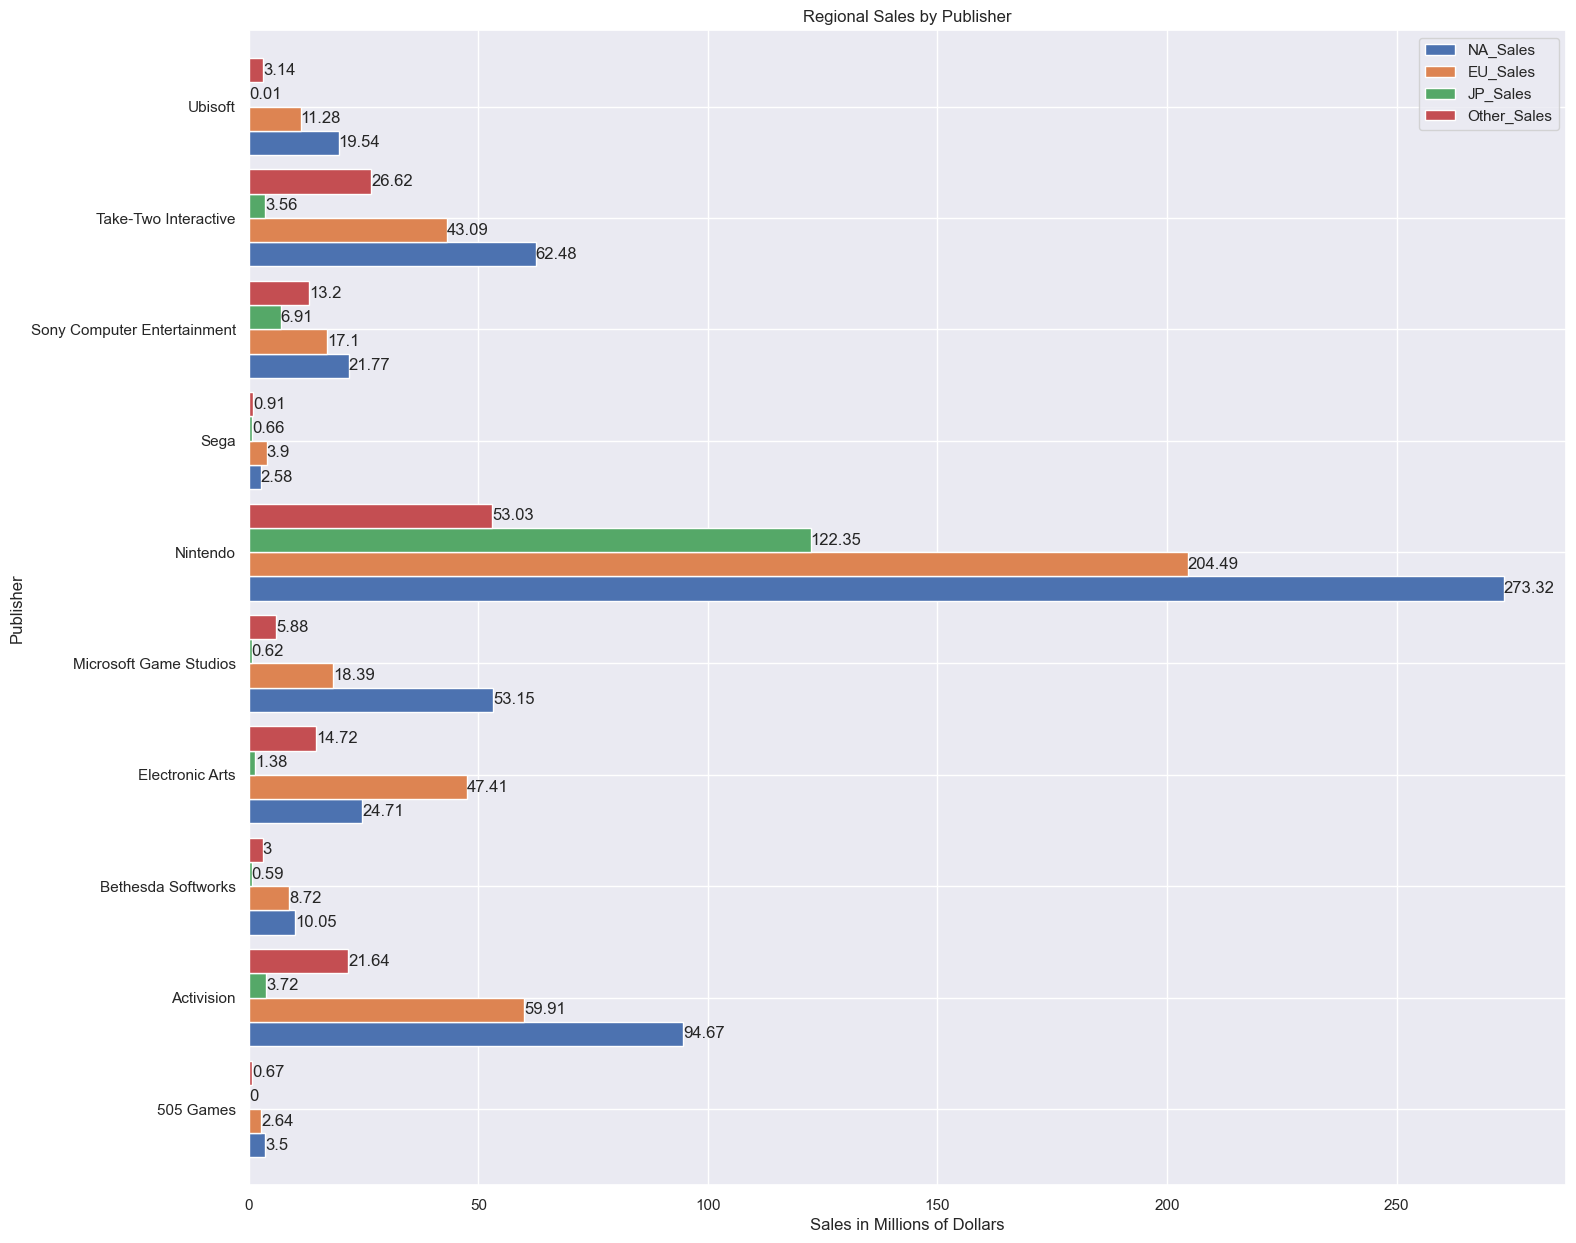

In [24]:
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.bar.html
#https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label
sales_by_region = top_game_sales[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
publisher_sales_by_region = sales_by_region.groupby('Publisher').sum()
ax = publisher_sales_by_region.plot(kind='barh', width=.87, figsize=(17, 15))

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Sales in Millions of Dollars")
plt.title("Regional Sales by Publisher")

### In the three major sales regions and the combination of the remaining regions, Nintendo had the highest cumulative sales during the 2001-2015 period by a large margin. Activision had the second highest sales figures in the North American and European regions, Sony had the second highest sales in Japan, and Take-Two was second in the combined remaining regions.

## 2. Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

Text(0, 0.5, 'Total Sales in Millions of Dollars')

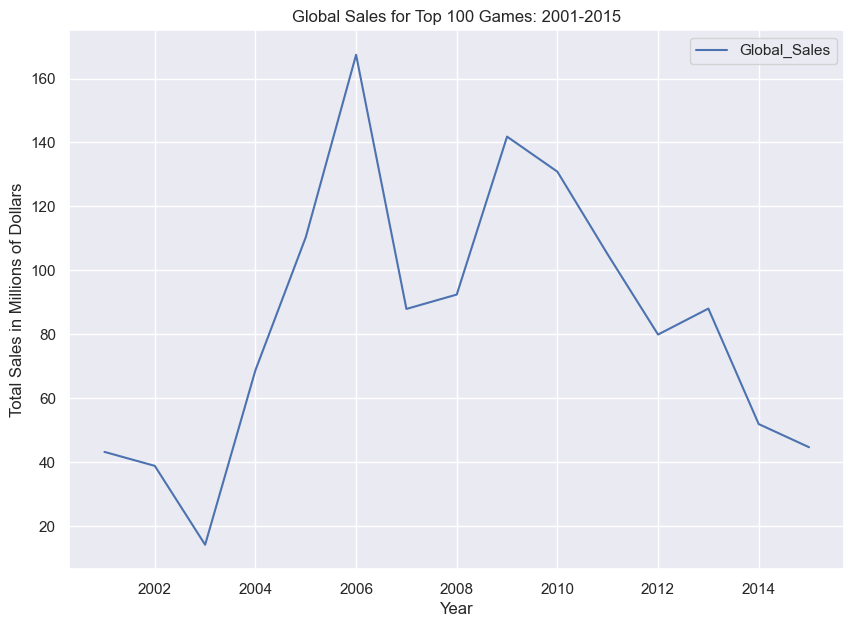

In [7]:
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.line.html
global_sales_by_year = top_game_sales[['Year', 'Global_Sales']].groupby('Year').sum()
global_sales_by_year.plot(kind='line', figsize=(10, 7), title = 'Global Sales for Top 100 Games: 2001-2015')
plt.ylabel("Total Sales in Millions of Dollars")


### Overall game sales experienced explosive growth from 2003 to 2006. During this period, sales rose from under 20M to 160M in global sales. There was a slight downturn from 2006 to 2008 with a drop to around 90M for these two years. Sales had another peak of over 140M in 2009, but then experienced a steady decline from there until 2015. In 2015, sales were just over 40M marking a return to the numbers seen in 2001/2002, where our tracking of modern game sales began. 

## 3. Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

<AxesSubplot:title={'center':'Distribution of Action-Game Sales'}, ylabel='Frequency'>

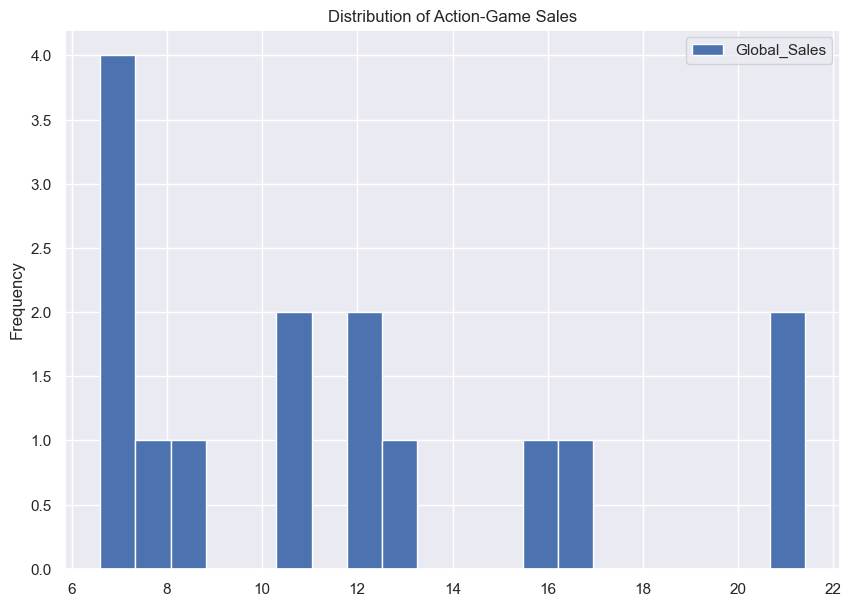

In [8]:
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.hist.html
action_games = top_game_sales[top_game_sales['Genre'] == 'Action']
action_games[['Global_Sales']].plot(kind ='hist', bins=20, figsize=(10, 7), title = 'Distribution of Action-Game Sales')



### We can see here that the majority of sales for action titles remain under the 14M mark with the most common range falling within 7-9M. Only four games broke the 14M range, with two reaching the 16-17M range and two reaching the 21M range. 

## 4. North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

Text(0.5, 1.0, 'Percent of North American Sales by Genre')

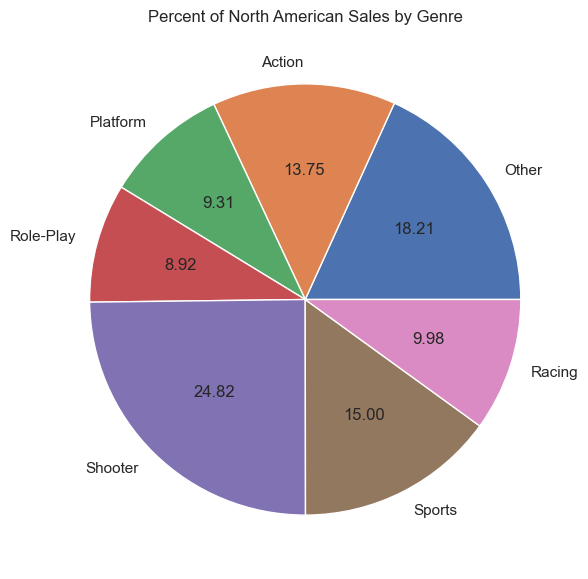

In [9]:
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.pie.html
NA_sales_by_genre = top_game_sales[['Genre', 'NA_Sales']].groupby('Genre').sum()

Other = (NA_sales_by_genre.loc['Misc'].values[0] + 
      NA_sales_by_genre.loc['Fighting'].values[0] +
      NA_sales_by_genre.loc['Puzzle'].values[0] +
      NA_sales_by_genre.loc['Simulation'].values[0])
Action = NA_sales_by_genre.loc['Action'].values[0]
Platform = NA_sales_by_genre.loc['Platform'].values[0]
Role_Playing = NA_sales_by_genre.loc['Role-Playing'].values[0]
Shooter = NA_sales_by_genre.loc['Shooter'].values[0]
Sports = NA_sales_by_genre.loc['Sports'].values[0]
Racing = NA_sales_by_genre.loc['Racing'].values[0]

index = ['Other', 'Action', 'Platform', 'Role-Play', 'Shooter', 'Sports', 'Racing']

NA_sales_df = pd.DataFrame({'Sales': [Other, Action, Platform, Role_Playing, Shooter, Sports, Racing]
                  }, index=index)

plot = NA_sales_df.plot.pie(y = 'Sales', legend=None, autopct="%.2f", figsize=(10, 7))
plt.ylabel("")
plt.title("Percent of North American Sales by Genre")


### In the North American market, shooter games had the largest percentage of sales, almost 25% of the market. Sports and action games had the second and third largest percentage of the market, with 15% and 14% respectively. 
* 'Other' category contains the following genres: Simulation, Puzzle, Fighting, and Misc.

## 5. European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

Text(0.5, 1.0, 'Percent of European Sales by Genre')

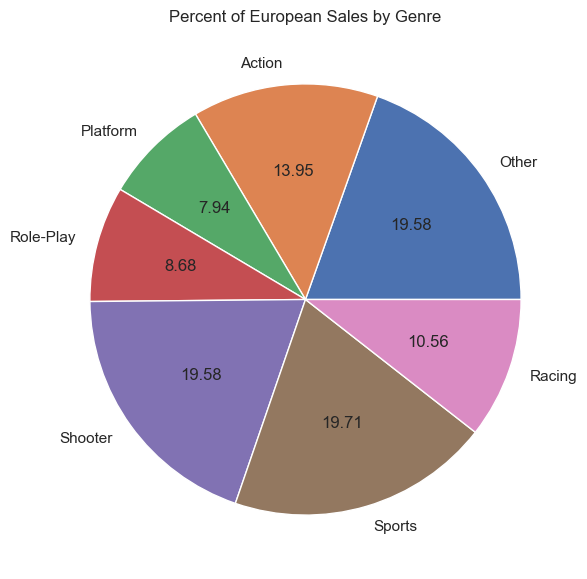

In [10]:
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.pie.html
EU_sales_by_genre = top_game_sales[['Genre', 'EU_Sales']].groupby('Genre').sum()

Other = (EU_sales_by_genre.loc['Misc'].values[0] + 
      EU_sales_by_genre.loc['Fighting'].values[0] +
      EU_sales_by_genre.loc['Puzzle'].values[0] +
      EU_sales_by_genre.loc['Simulation'].values[0])
Action = EU_sales_by_genre.loc['Action'].values[0]
Platform = EU_sales_by_genre.loc['Platform'].values[0]
Role_Playing = EU_sales_by_genre.loc['Role-Playing'].values[0]
Shooter = EU_sales_by_genre.loc['Shooter'].values[0]
Sports = EU_sales_by_genre.loc['Sports'].values[0]
Racing = EU_sales_by_genre.loc['Racing'].values[0]

index = ['Other', 'Action', 'Platform', 'Role-Play', 'Shooter', 'Sports', 'Racing']

EU_sales_df = pd.DataFrame({'Sales': [Other, Action, Platform, Role_Playing, Shooter, Sports, Racing]
                  }, index=index)

plot = EU_sales_df.plot.pie(y = 'Sales', legend=None, autopct="%.2f", figsize=(10, 7))
plt.ylabel("")
plt.title("Percent of European Sales by Genre")


### In the European market, shooter and sports were the two largest genres representing approximately 20% of market share each. Action was the third largest genre with approximately 14% of market share.
* 'Other' category contains the following genres: Simulation, Puzzle, Fighting, and Misc.

## 6. Explain differences and similarities between the North American and European charts in markdown.

### The North America and European sales by genre were broadly similar. Both markets saw shooter, action, and sports games as the three biggest genres in terms of sales. The primary difference was the move from shooters to sports in the European market. In both markets, these two genres represented a total of approximately 40% of sales, but in Europe, the two were equal, while in North America, the shooters share of the market was 10% higher than that of sports. 

## 7. Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

Platform
Nintendo       46
Other           1
PlayStation    34
XBox           19
dtype: int64


Text(0.5, 1.0, 'Number of Games in Top 100 by Platform')

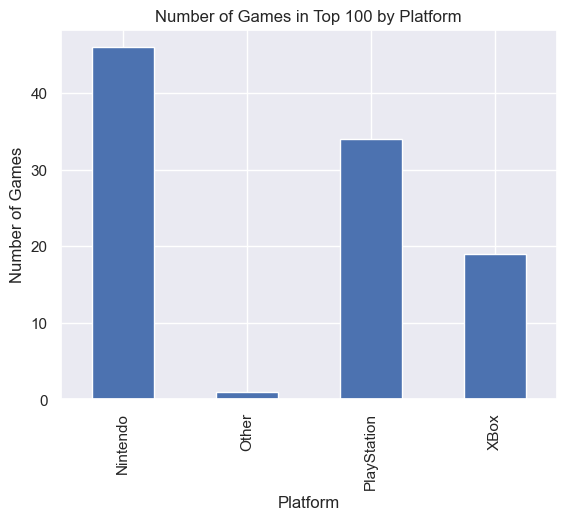

In [30]:
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.bar.html
games_by_platform = top_game_sales[['Platform']].groupby('Platform').size()
print(games_by_platform)
games_by_platform.plot(kind='bar')
plt.ylabel("Number of Games")
plt.title("Number of Games in Top 100 by Platform")

### When looking at the platform with the most games in the top 100, we can see that Nintendo had the most with 46 games. Playstation had the second most with 34, and Microsoft had the third most with 19 games. Only 1 game that made it into the top 100 was a platform outside of the top three.